In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from main import MiddleLayer, OutputLayer, relu, relu_dash, softmax, error_dash

In [3]:
from sklearn import datasets

iris_data = datasets.load_iris()
row_data_X = iris_data.data
row_data_Y = iris_data.target
n_data = len(row_data_X)

n_data

150

In [4]:
ave_X = np.average(row_data_X, axis=0)
std_X = np.std(row_data_X, axis=0)
data_X = (row_data_X - ave_X) / std_X

In [5]:
data_Y = np.zeros((n_data, 3))
for i in range(n_data):
    data_Y[i, row_data_Y[i]] = 1

In [6]:
idx = np.arange(n_data)
train_idx = idx[idx % 2 == 0]
test_idx = idx[idx % 2 == 1]

train_X = data_X[train_idx]
train_Y = data_Y[train_idx]
test_X = data_X[test_idx]
test_Y = data_Y[test_idx]

In [7]:
n_train = len(train_X)
n_test = len(train_Y)

n_test, n_train

(75, 75)

In [8]:
n_in = 4
n_mid1 = 25
n_mid2 = 25
n_out = 3

In [9]:
wb_width = 0.1
eta = 0.01
epoch = 100
batch_size = 8
interval = 10

In [10]:
layers = []

layers.append(MiddleLayer(n_in, n_mid1, activation_func=relu, activation_func_dash=relu_dash, wb_width=wb_width, eta=eta))
layers.append(MiddleLayer(n_mid1, n_mid2, activation_func=relu, activation_func_dash=relu_dash, wb_width=wb_width, eta=eta))
layers.append(OutputLayer(n_mid2, n_out, activation_func=softmax, error_func_dash=error_dash, wb_width=wb_width, eta=eta))

In [11]:
def forward(X):
    Y = X[:]
    for layer in layers:
        Y = layer.forward(Y)
    return Y

def backward(Y):
    X = Y[:]
    for layer in layers[::-1]:
        X = layer.backward(X)
    return X

In [12]:
def get_error(Y, T, batch_size):
    return -np.sum(T * np.log(Y + 1e-7)) / batch_size

In [13]:
def correct_rate(Y, T, size):
    return np.sum(np.argmax(Y, axis=1) == np.argmax(T, axis=1)) / size


In [14]:
train_error_x = []
train_error_y = []
test_error_x = []
test_error_y = []

In [15]:
for i in range(epoch):

    Y = forward(train_X)
    error_train = get_error(Y, train_Y, n_train)

    Y = forward(test_X)
    error_test = get_error(Y, test_Y, n_test)

    train_error_x.append(i)
    train_error_y.append(error_train)
    test_error_x.append(i)
    test_error_y.append(error_test)

    if i % interval == 0:
        print(f"Epoch: {i} / {epoch}", f"Error_train: {error_train}", f"Error_test: {error_test}")
    
    index_random = np.arange(n_train)
    np.random.shuffle(index_random)
    for j in range(0, n_train, batch_size):
        mb_index = index_random[j : j + batch_size]
        X = train_X[mb_index]
        Y = train_Y[mb_index]

        forward(X)
        backward(Y)

Epoch: 0 / 100 Error_train: 1.103120333654238 Error_test: 1.1034561755548755
Epoch: 10 / 100 Error_train: 0.5026858418432881 Error_test: 0.5086189970683305
Epoch: 20 / 100 Error_train: 0.24609333485147086 Error_test: 0.24146521810415664
Epoch: 30 / 100 Error_train: 0.11944536111333119 Error_test: 0.15444584174712997
Epoch: 40 / 100 Error_train: 0.06542412905282298 Error_test: 0.08689415015823436
Epoch: 50 / 100 Error_train: 0.052886494594656976 Error_test: 0.07163653198384905
Epoch: 60 / 100 Error_train: 0.0400301969454123 Error_test: 0.06901466714617732
Epoch: 70 / 100 Error_train: 0.03473901780820742 Error_test: 0.08055497023663992
Epoch: 80 / 100 Error_train: 0.029136217505276216 Error_test: 0.07635332702446451
Epoch: 90 / 100 Error_train: 0.02536904725360878 Error_test: 0.07431898222107877


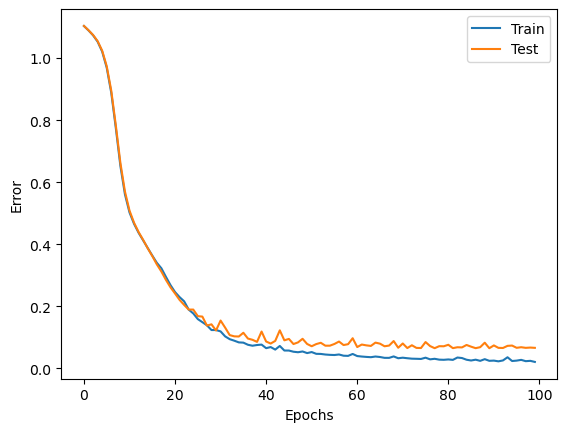

In [16]:
plt.plot(train_error_x, train_error_y, label="Train")
plt.plot(test_error_x, test_error_y, label="Test")
plt.legend()

plt.xlabel("Epochs")
plt.ylabel("Error")

plt.show()

In [18]:
Y = forward(train_X)
print(f"Accuracy Train: {correct_rate(Y, train_Y, n_train) * 100}%")

Y = forward(test_X)
print(f"Accuracy Test: {correct_rate(Y, test_Y, n_test) * 100}%")

Accuracy Train: 100.0%
Accuracy Test: 97.33333333333334%
